# **QUESTION 1**

## PART 1

In [8]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import imageio.v2 as iio
from cvxopt import matrix, solvers
from itertools import combinations

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [9]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:

X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = pd.DataFrame(data=iris.target, columns=['target'])
Label = {iris.target_names[0] : 0 , iris.target_names[1] : 1 , iris.target_names[2] : 2 }
target_list = iris.target
target_flower = iris.target_names[target_list]
y['flower'] = target_flower


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [12]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  150 non-null    int64 
 1   flower  150 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [13]:
data_set = pd.concat([X,y['target']], axis=1)
data_set

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [14]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


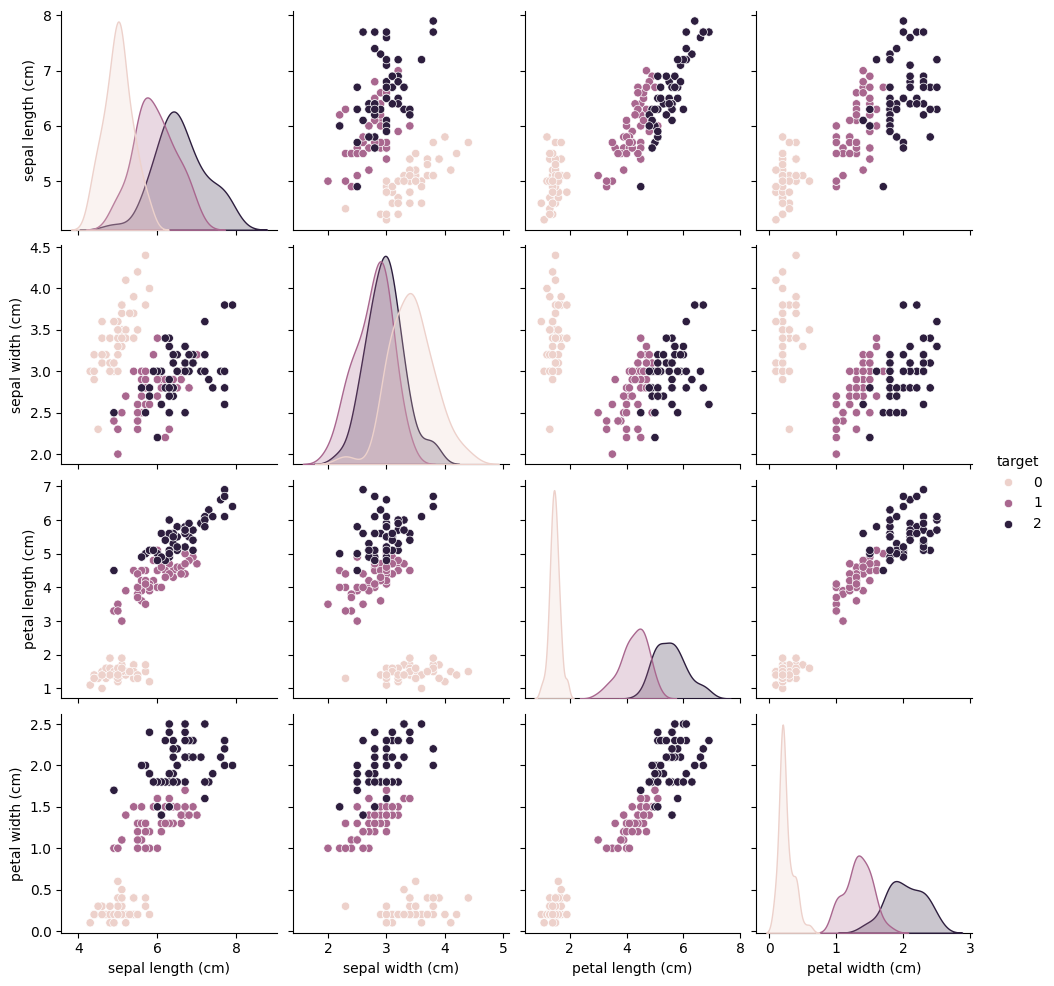

In [15]:
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['figure.dpi'] = 100

sb.pairplot(data_set, hue='target')

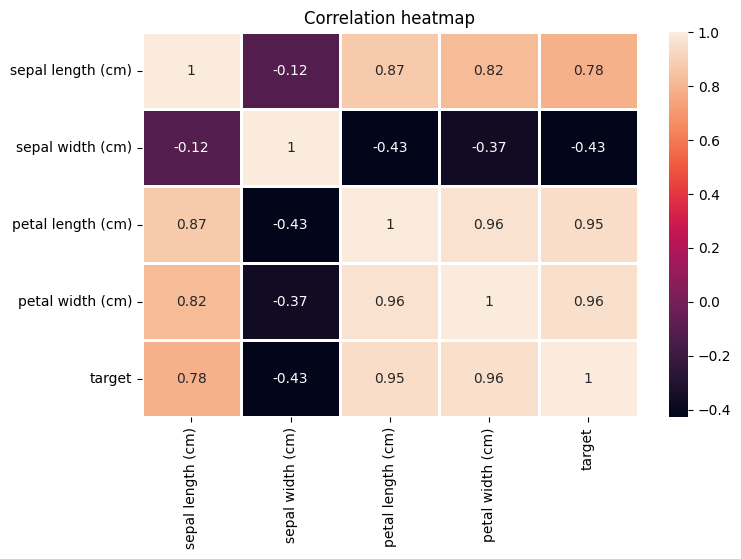

In [16]:
sb.heatmap(data_set.corr(), annot=True, linewidth=1);
plt.title('Correlation heatmap');

In [17]:
y

,target,flower
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa
...,...,...
145,2,virginica
146,2,virginica
147,2,virginica
148,2,virginica


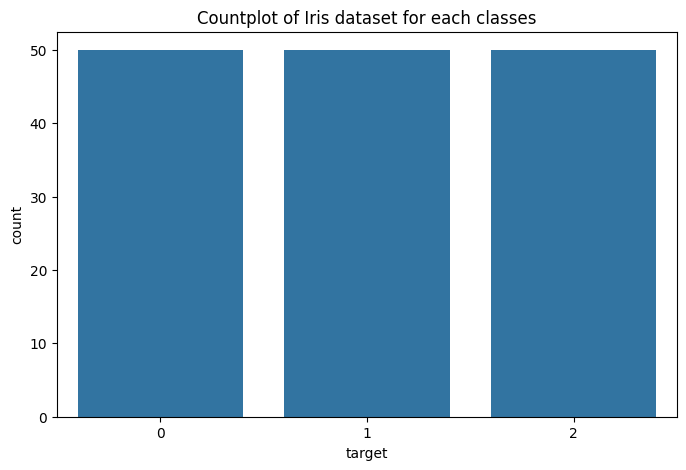

In [18]:
sb.countplot(x="target", data=y);
plt.title('Countplot of Iris dataset for each classes');

In [19]:
tsne = TSNE(n_components=2, random_state=14, verbose=0)
X_tsne = tsne.fit_transform(X)

Text(0, 0.5, 'Feature 2')

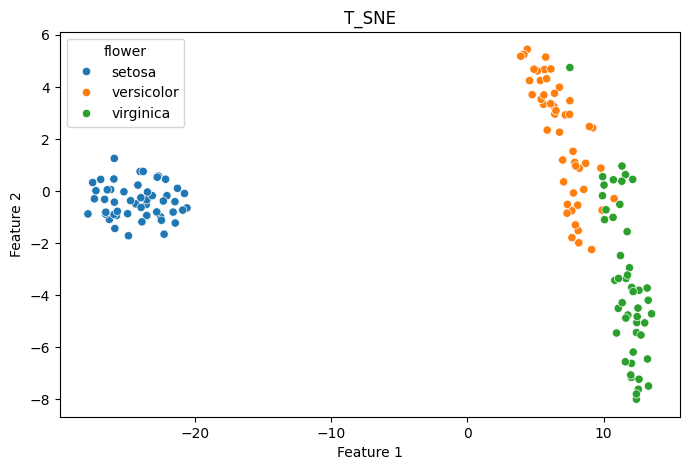

In [20]:
sb.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y['flower'])
plt.title('T_SNE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

## Part 2

In [21]:
X_sh , Y_sh = shuffle(X , y['target'] , random_state = 14)


In [22]:
x_train, x_test, y_train, y_test = train_test_split(X_sh, Y_sh, test_size=0.2, random_state=14)
print(f"size of the train data is {x_train.shape}{y_train.shape} , size of the test data is {x_test.shape}{y_test.shape}")

size of the train data is (120, 4)(120,) , size of the test data is (30, 4)(30,)


In [23]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_norm = scaler.transform(x_train)
x_test_norm = scaler.transform(x_test)

In [24]:
pca = PCA(n_components=2, random_state=14)
pca.fit(x_train_norm)
x_train_pca = pca.transform(x_train_norm)
x_test_pca = pca.transform(x_test_norm)
print(x_train_pca.shape, x_test_pca.shape)

(120, 2) (30, 2)


Text(0.5, 1.0, 'PCA')

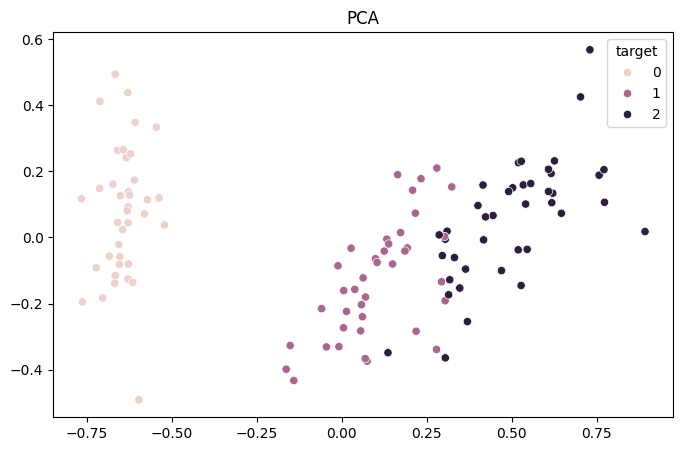

In [25]:
sb.scatterplot(x=x_train_pca[:, 0], y=x_train_pca[:, 1], hue=y_train)
plt.title('PCA')

In [26]:
PCA = svm.SVC( kernel='linear', random_state=14)

PCA.fit(x_train_pca, y_train)

y_pred_pca = PCA.predict(x_test_pca)

PCA.score(x_test_pca, y_test)

0.9666666666666667

Text(0, 0.5, 'Feature 2')

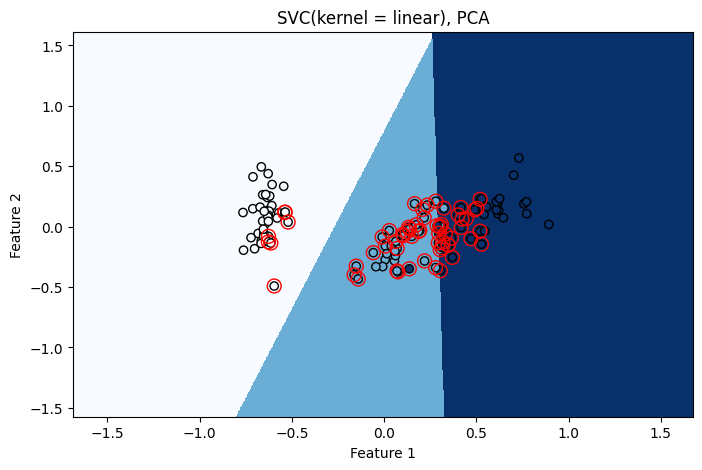

In [27]:
ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(
        PCA,
        x_test_pca,
        response_method="predict",
        grid_resolution=1000,
        plot_method="pcolormesh",
        cmap='Blues',
        ax=ax,
)

plt.scatter(x=x_train_pca[:, 0], y=x_train_pca[:, 1], c=y_train, edgecolors='k', cmap='Blues')

ax.scatter(
    PCA.support_vectors_[:, 0],
    PCA.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="red",
)

plt.title('SVC(kernel = linear), PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Text(0.5, 1.0, 'SVC(kernel = linear), PCA')

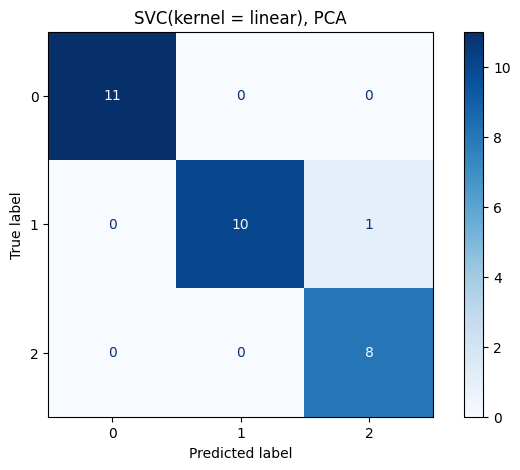

In [28]:
cm_pca = confusion_matrix(y_test, y_pred_pca)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_pca)
disp.plot(cmap='Blues')
plt.title('SVC(kernel = linear), PCA')

In [29]:
lda = LDA(n_components=2)
lda.fit(x_train_norm, y_train)
x_train_lda = lda.transform(x_train_norm)
x_test_lda = lda.transform(x_test_norm)
print(x_train_lda.shape, x_test_lda.shape)

(120, 2) (30, 2)


Text(0.5, 1.0, 'LDA')

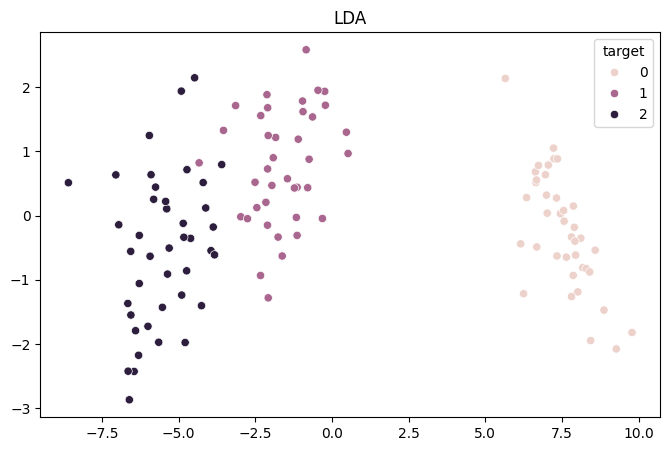

In [30]:
sb.scatterplot(x=x_train_lda[:, 0], y=x_train_lda[:, 1], hue=y_train)
plt.title('LDA')

In [34]:
# Define model
LDA = svm.SVC(kernel='linear', random_state=14)

# Train model
LDA.fit(x_train_lda, y_train)

# Prediction
y_pred_lda = LDA.predict(x_test_lda)

LDA.score(x_test_lda, y_test)

0.9666666666666667

Text(0.5, 1.0, 'SVC(kernel = linear), LDA')

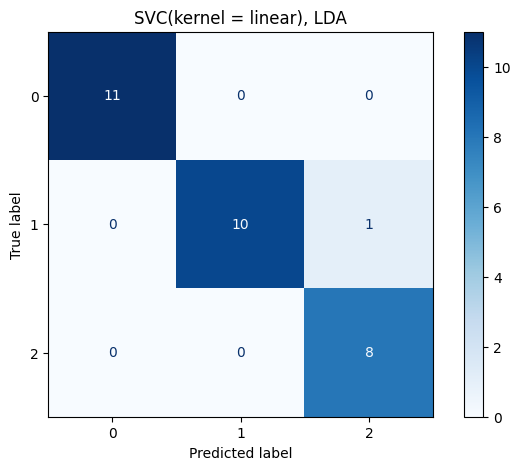

In [32]:
cm_lda = confusion_matrix(y_test, y_pred_lda)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lda)
disp.plot(cmap='Blues')
plt.title('SVC(kernel = linear), LDA')

Text(0, 0.5, 'Feature 2')

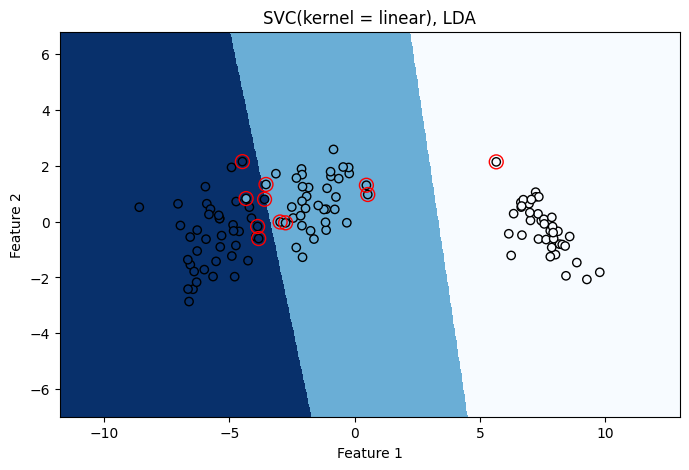

In [33]:
ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(
        LDA,
        x_test_lda,
        response_method="predict",
        grid_resolution=1000,
        plot_method="pcolormesh",
        cmap='Blues',
        ax=ax,
        eps=4
)

plt.scatter(x=x_train_lda[:, 0], y=x_train_lda[:, 1], c=y_train, edgecolors='k', cmap='Blues')

ax.scatter(
    LDA.support_vectors_[:, 0],
    LDA.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="red",
)

plt.title('SVC(kernel = linear), LDA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

## PART 3


In [35]:
images = []

for i in range(1,11):
  clf_poly_lda = svm.SVC(kernel='poly', degree=i, C=0.5, random_state=14)

  clf_poly_lda.fit(x_train_lda, y_train)

  y_pred_poly_lda = clf_poly_lda.predict(x_test_lda)

  # Print accuracy and f1-score
  print(f'Degree = {i}, accuracy = {accuracy_score(y_test,  y_pred_poly_lda)* 100:.2f}, f1-score = {f1_score(y_test,  y_pred_poly_lda, average="macro"):.2f}')

  # Plot decision boundary
  fig, ax = plt.figure() , plt.gca()

  DecisionBoundaryDisplay.from_estimator(clf_poly_lda,x_test_lda,response_method="auto",grid_resolution=1000,plot_method="pcolormesh",ax=ax,eps=5
  )

  plt.scatter(x=x_train_lda[:, 0], y=x_train_lda[:, 1], c=y_train, edgecolors='k', cmap='Blues')

  ax.scatter(
    clf_poly_lda.support_vectors_[:, 0],
    clf_poly_lda.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="red",
  )

  plt.title(f'SVC(kernel = poly, degree = {i}), LDA')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')

  plt.savefig(f'sklearn_poly_degree_{i}.png')
  images.append(iio.imread((f'sklearn_poly_degree_{i}.png')))
  plt.close('all')


iio.mimsave('sklearn_decision_boundries.gif', images, duration=1000, loop=0)


Degree = 1, accuracy = 96.67, f1-score = 0.96
Degree = 2, accuracy = 86.67, f1-score = 0.86
Degree = 3, accuracy = 100.00, f1-score = 1.00
Degree = 4, accuracy = 86.67, f1-score = 0.86
Degree = 5, accuracy = 100.00, f1-score = 1.00
Degree = 6, accuracy = 86.67, f1-score = 0.86
Degree = 7, accuracy = 96.67, f1-score = 0.96
Degree = 8, accuracy = 73.33, f1-score = 0.71
Degree = 9, accuracy = 90.00, f1-score = 0.88
Degree = 10, accuracy = 66.67, f1-score = 0.63


## PART 4

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [37]:
#Load iris dataset
iris = load_iris()
data_x = iris.data
data_y = iris.target

# Perform LDA to reduce to 2 components
lda = LDA(n_components=2)
X_lda = lda.fit_transform(data_x, data_y)

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(X_lda, data_y, test_size=0.2, random_state=14)

# Standardize features
# Standardize features
scaler = StandardScaler()
scaler.fit(x_train)

x_train_stand = scaler.transform(x_train)
x_test_stand = scaler.transform(x_test)

# Figure parameters
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['figure.dpi'] = 120

In [38]:
# Define SVM class from scratch
class SVM:
    def __init__(self, degree=3, C=None):
        self.degree = degree
        self.reg_par = C
        self.models = []
        self.classes_num = []

    def polynomial_kernel(self, X, Y=None):
        if Y is None:
            Y = X
        return (1 + np.dot(X, Y.T)) ** self.degree

    def fit(self, X, y):
        self.classes_num = np.unique(y)
        num_samples, num_features = X.shape

        # Train one-vs-one SVMs
        for (i, j) in combinations(self.classes_num, 2):
            mask = (y == i) | (y == j)
            X_ele = X[mask]
            y_ele_h = y[mask]
            y_ele = np.where(y_ele_h == i, 1, -1)

            Kernel_num = self.polynomial_kernel(X_ele)
            P = matrix(np.outer(y_ele, y_ele) * Kernel_num + np.eye(len(y_ele)) * 1e-2)  # Increased regularization term
            q = matrix(-np.ones(len(y_ele)))
            A = matrix(y_ele, (1, len(y_ele)), 'd')
            b = matrix(0.0)

            if self.reg_par is None:
                G = matrix(-np.eye(len(y_ele)))
                h = matrix(np.zeros(len(y_ele)))
            else:
                G = matrix(np.vstack((-np.eye(len(y_ele)), np.eye(len(y_ele)))))
                h = matrix(np.hstack((np.zeros(len(y_ele)), np.ones(len(y_ele)) * self.reg_par)))

            solvers.options['show_progress'] = False
            sol = solvers.qp(P, q, G, h, A, b)
            alpha = np.ravel(sol['x'])

            sv = alpha > 1e-5
            if np.sum(sv) == 0:
                print(f"Warning: No support vectors for pair ({i}, {j}).")
                continue

            index = np.arange(len(alpha))[sv]
            alpha = alpha[sv]
            sv_X_data = X_ele[sv]
            sv_y_data = y_ele[sv]

            b = 0
            for n in range(len(alpha)):
                b += sv_y_data[n]
                b -= np.sum(alpha * sv_y_data * Kernel_num[index[n], sv])
            b = b / len(alpha)

            self.models.append((alpha, sv_X_data, sv_y_data, b))

    def project(self, X):
        target_pred = np.zeros((X.shape[0], len(self.models)))
        for i, (alpha, sv, sv_y_data, b) in enumerate(self.models):
            target_pred[:, i] = np.sum(alpha * sv_y_data * self.polynomial_kernel(X, sv), axis=1) + b
        return target_pred

    def predict(self, X):
        target_pred = self.project(X)
        votes = np.zeros((X.shape[0], len(self.classes_num)))
        counter = 0
        for i, j in combinations(range(len(self.classes_num)), 2):
            votes[:, i] += (target_pred[:, counter] > 0).astype(int)
            votes[:, j] += (target_pred[:, counter] < 0).astype(int)
            counter = counter + 1
        return self.classes_num[np.argmax(votes, axis=1)]

    def plot_decision_boundary(self, X, y):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        fig = plt.figure()
        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
        plt.title(f"SVM with polynomial kernel from Scratch (degree = {self.degree}), LDA")
        return fig

In [39]:
images = []

for i in range(1,11):
  # Define the model
  clf = SVM(degree=i)

  # Train model
  clf.fit(x_train_stand, y_train)

  # Prediction
  y_pred = clf.predict(x_test_stand)

  # Print accuracy and f1-score
  print(f'Degree = {i}, accuracy = {accuracy_score(y_test,  y_pred)* 100:.2f}, f1-score = {f1_score(y_test,  y_pred, average="macro"):.2f}')

  # Plot decision boundary
  clf.plot_decision_boundary(x_train_stand, y_train)
  plt.savefig(f'scratch_poly_degree_{i}.png')
  images.append(iio.imread((f'scratch_poly_degree_{i}.png')))
  plt.close('all')

iio.mimsave('scratch_decision_boundries.gif', images, duration=1000, loop=0)


Degree = 1, accuracy = 100.00, f1-score = 1.00
Degree = 2, accuracy = 100.00, f1-score = 1.00
Degree = 3, accuracy = 100.00, f1-score = 1.00
Degree = 4, accuracy = 100.00, f1-score = 1.00
Degree = 5, accuracy = 93.33, f1-score = 0.91
Degree = 6, accuracy = 96.67, f1-score = 0.96
Degree = 7, accuracy = 90.00, f1-score = 0.86
Degree = 8, accuracy = 90.00, f1-score = 0.86
Degree = 9, accuracy = 90.00, f1-score = 0.86
Degree = 10, accuracy = 90.00, f1-score = 0.86


# **QUESTION 2**

In [109]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter
import random
import os

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GaussianNoise
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler

## Part 1


In [78]:
!pip install --upgrade --no-cach-dir gdown

#normal
!gdown 1fNUmUooivcTKH0UzhQy_G4pJ478H8NXd



Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --no-cach-dir
Downloading...
From (original): https://drive.google.com/uc?id=1fNUmUooivcTKH0UzhQy_G4pJ478H8NXd
From (redirected): https://drive.google.com/uc?id=1fNUmUooivcTKH0UzhQy_G4pJ478H8NXd&confirm=t&uuid=f41d00a4-852d-4670-9a14-e03312029fd6
To: /content/creditcard.csv
100% 151M/151M [00:00<00:00, 172MB/s]


In [110]:
dataset = pd.read_csv('/content/creditcard.csv')

In [111]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [112]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [113]:
#extract time column
new_data = dataset.iloc[:,1:]

In [114]:
new_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [115]:
len(new_data.Class)

284807

In [116]:
new_data.Class.unique()


array([0, 1])

In [117]:
print(f"number of class 1 is {np.sum(new_data.Class == 1)} and number of class 0 is {np.sum(new_data.Class == 0)}")

number of class 1 is 492 and number of class 0 is 284315


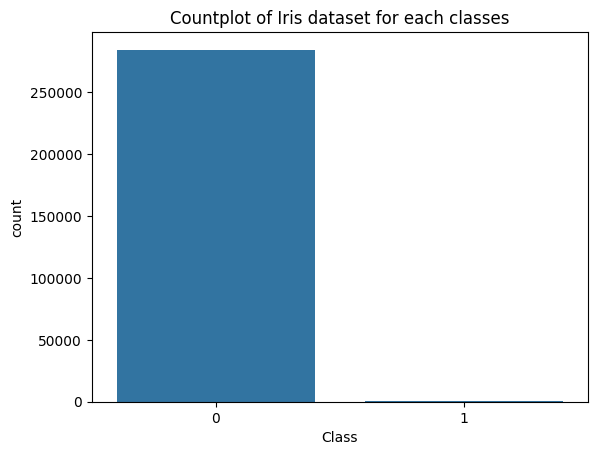

In [118]:
sb.countplot(x="Class", data=new_data);
plt.title('Countplot of Iris dataset for each classes');

In [119]:
#normalized amount features
scaler = MinMaxScaler()
mat = np.array(new_data['Amount']).reshape(-1,1)
scaler.fit(mat)

Amount_norm = scaler.transform(mat)

new_data['Amount'] = Amount_norm

In [120]:
new_data['Amount']

0         0.005824
1         0.000105
2         0.014739
3         0.004807
4         0.002724
            ...   
284802    0.000030
284803    0.000965
284804    0.002642
284805    0.000389
284806    0.008446
Name: Amount, Length: 284807, dtype: float64

In [125]:
x = new_data.iloc[:,0:-1]
y = new_data.iloc[:,-1]

In [127]:
x , y

(               V1         V2        V3        V4        V5        V6  \
 0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
 1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
 2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
 3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
 4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
 ...           ...        ...       ...       ...       ...       ...   
 284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
 284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
 284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
 284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
 284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   
 
               V7        V8        V9       V10  ...       V20       V21  \
 0       0.239599  0.098698  0.363787  0.09079

In [128]:
x_train, x_val_test, y_train, y_val_test = train_test_split(x.values, y.values, test_size=0.3, random_state=14)
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=14)

In [132]:
print(f" size x train is {x_train.shape} \n size x test is {x_test.shape} \n size x validation is {x_val.shape} ")
print('------------------')
print(f" size y train is {y_train.shape} \n size y test is {y_test.shape} \n size x validation is {y_val.shape} ")

 size x train is (199364, 29) 
 size x test is (42722, 29) 
 size x validation is (42721, 29) 
------------------
 size y train is (199364,) 
 size y test is (42722,) 
 size x validation is (42721,) 


In [134]:
# Apply SMOTE to the training data
sm = SMOTE(sampling_strategy='minority', random_state=14)

x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

print(f"Labeles befor oversampling: {Counter(y_train)}")
print(f"Labeles After oversampling: {Counter(y_train_res)}")

Labeles befor oversampling: Counter({0: 199013, 1: 351})
Labeles After oversampling: Counter({0: 199013, 1: 199013})


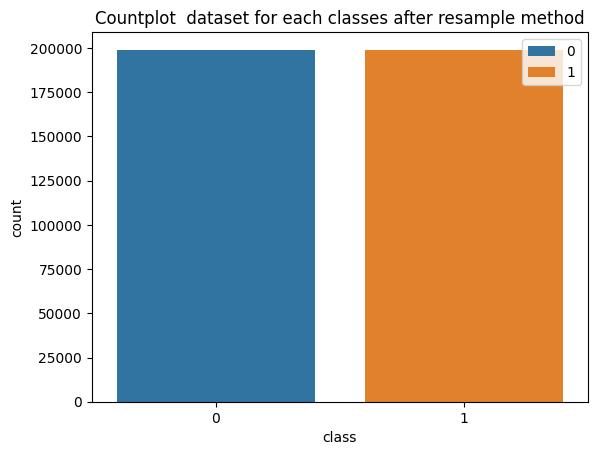

In [154]:

x_plot = pd.Series( y_train_res , name='class' )
sb.countplot ( x = x_plot , hue = y_train_res )
plt.title('Countplot  dataset for each classes after resample method');

In [155]:
# Add Gaussian noise to the resampled training data
noise_factor = 0.4
x_train_noisy = x_train_res + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_res.shape)

## PART 2

In [160]:
Model = Sequential([Dense(22, activation='relu', input_shape=(29,)),Dense(15, activation='leaky_relu'),Dense(10, activation='relu'),Dense(15, activation='leaky_relu'),Dense(22, activation='relu'),Dense(29, activation='leaky_relu')])

Model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

Model_checkpoint = ModelCheckpoint('best_DAE.keras', monitor='val_loss', save_best_only=True, mode='min')

Model_histoy = Model.fit(x_train_noisy,x_train_res,epochs=10,batch_size=64,validation_data=(x_val, x_val),callbacks=[Model_checkpoint],verbose=2)

# Load the best weights for DAE
Model.load_weights('best_DAE.keras')

Epoch 1/10
6220/6220 - 15s - loss: 1.0184 - accuracy: 0.5144 - val_loss: 0.5011 - val_accuracy: 0.5517 - 15s/epoch - 2ms/step
Epoch 2/10
6220/6220 - 15s - loss: 0.4555 - accuracy: 0.6419 - val_loss: 0.4449 - val_accuracy: 0.5796 - 15s/epoch - 2ms/step
Epoch 3/10
6220/6220 - 14s - loss: 0.4109 - accuracy: 0.6609 - val_loss: 0.4268 - val_accuracy: 0.5860 - 14s/epoch - 2ms/step
Epoch 4/10
6220/6220 - 14s - loss: 0.3890 - accuracy: 0.6691 - val_loss: 0.4041 - val_accuracy: 0.5971 - 14s/epoch - 2ms/step
Epoch 5/10
6220/6220 - 14s - loss: 0.3683 - accuracy: 0.6754 - val_loss: 0.3827 - val_accuracy: 0.6039 - 14s/epoch - 2ms/step
Epoch 6/10
6220/6220 - 14s - loss: 0.3534 - accuracy: 0.6817 - val_loss: 0.3730 - val_accuracy: 0.6165 - 14s/epoch - 2ms/step
Epoch 7/10
6220/6220 - 14s - loss: 0.3443 - accuracy: 0.6856 - val_loss: 0.3583 - val_accuracy: 0.6191 - 14s/epoch - 2ms/step
Epoch 8/10
6220/6220 - 14s - loss: 0.3366 - accuracy: 0.6907 - val_loss: 0.3487 - val_accuracy: 0.6328 - 14s/epoch - 2

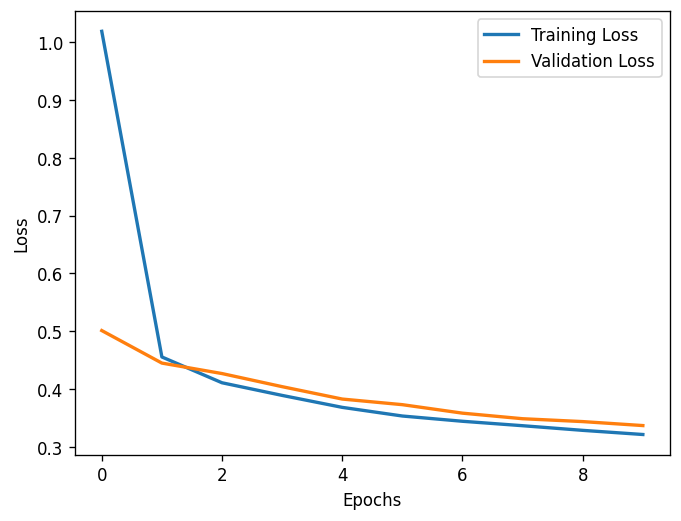

In [162]:
plt.rcParams['figure.dpi'] = 120
plt.plot(Model_histoy.history['loss'], linewidth=2)   # Training loss
plt.plot(Model_histoy.history['val_loss'], linewidth=2)  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()

In [165]:
# Prepare denoised data for training the classifier
x_train_denoised = Model.predict(x_train_noisy)
x_val_denoised = Model.predict(x_val)

# Define the classifier model
Model_2 = Sequential([Dense(22, activation='relu', input_shape=(29,)),Dense(15, activation='leaky_relu'),Dense(10, activation='relu'),Dense(5, activation='leaky_relu'),Dense(2, activation='sigmoid')])

Model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the classifier
Model_2_checkpoint = ModelCheckpoint('best_classifier.keras', monitor='val_loss', save_best_only=True, mode='min')

Model_2_history = Model_2.fit(x_train_denoised,y_train_res,epochs=10,batch_size=64,validation_data=(x_val_denoised, y_val),callbacks=[Model_2_checkpoint],verbose=2 )

# Load the best weights for classifier
Model_2.load_weights('best_classifier.keras')

1336/1336 [==============================] - 2s 2ms/step
Epoch 1/10
6220/6220 - 17s - loss: 0.1264 - accuracy: 0.9471 - val_loss: 0.0661 - val_accuracy: 0.9744 - 17s/epoch - 3ms/step
Epoch 2/10
6220/6220 - 15s - loss: 0.0938 - accuracy: 0.9612 - val_loss: 0.0857 - val_accuracy: 0.9637 - 15s/epoch - 2ms/step
Epoch 3/10
6220/6220 - 15s - loss: 0.0867 - accuracy: 0.9648 - val_loss: 0.0520 - val_accuracy: 0.9797 - 15s/epoch - 2ms/step
Epoch 4/10
6220/6220 - 15s - loss: 0.0832 - accuracy: 0.9664 - val_loss: 0.0592 - val_accuracy: 0.9748 - 15s/epoch - 2ms/step
Epoch 5/10
6220/6220 - 15s - loss: 0.0808 - accuracy: 0.9672 - val_loss: 0.0536 - val_accuracy: 0.9778 - 15s/epoch - 2ms/step
Epoch 6/10
6220/6220 - 17s - loss: 0.0792 - accuracy: 0.9681 - val_loss: 0.0569 - val_accuracy: 0.9765 - 17s/epoch - 3ms/step
Epoch 7/10
6220/6220 - 16s - loss: 0.0779 - accuracy: 0.9686 - val_loss: 0.0590 - val_accuracy: 0.9761 - 16s/epoch - 3ms/step
Epoch 8/10
6220/6220 - 15s - loss: 0.0769 - accuracy: 0.9692 

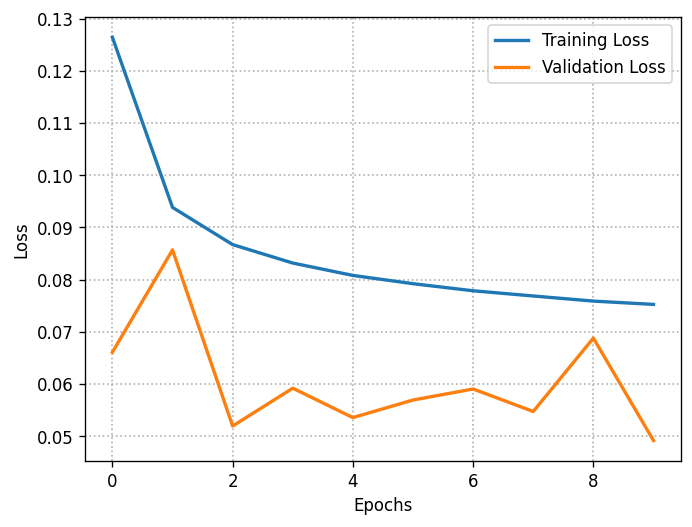

In [166]:
plt.plot(Model_2_history.history['loss'], linewidth=2)   # Training loss
plt.plot(Model_2_history.history['val_loss'],linewidth=2)  # Validation loss

plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True, linewidth = 1, linestyle=':')
plt.show()

In [168]:

y_prob = Model_2.predict( Model.predict(x_test))
y_pred = np.argmax(y_prob, axis=1)

print(f' Accuracy = {accuracy_score(y_test, y_pred)}')
print(f' Precision = {precision_score(y_test, y_pred)}')
print(f' Recall = {recall_score(y_test, y_pred)} ')
print(f' F1-Score = {f1_score(y_test, y_pred)} ')

1336/1336 [==============================] - 4s 3ms/step
 Accuracy = 0.9796825991292543
 Precision = 0.06746463547334058
 Recall = 0.8493150684931506 
 F1-Score = 0.125 


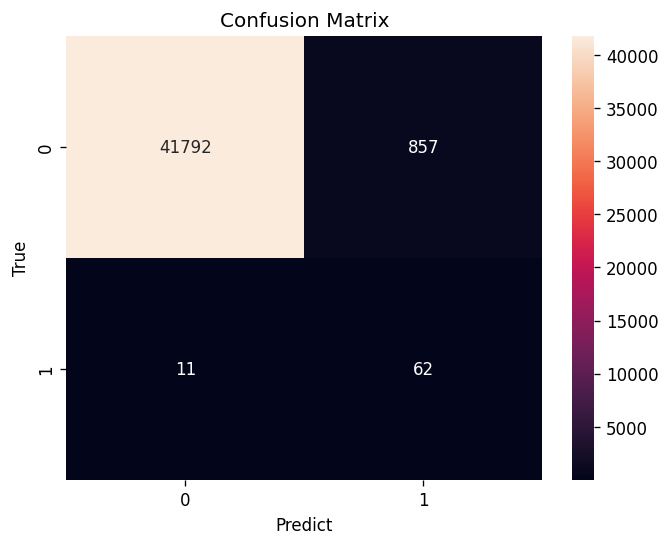

In [172]:


sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',)
plt.xlabel('Predict')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## PART 3

In [191]:
 np . arange ( 0.1 , 1 , 0.2)


array([0.1, 0.3, 0.5, 0.7, 0.9])

In [192]:
threshold = np.arange(0.1, 1, 0.2)
acc = []
rec = []

for i in threshold:
  print(f'Threshold = {i}')
  sm = SMOTE(sampling_strategy=i, random_state=14)
  x_train_res, y_train_res = sm.fit_resample(x_train, y_train)
  x_train_noisy = x_train_res + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_res.shape)

  Model_checkpoint = ModelCheckpoint('best_DAE.keras', monitor='val_loss', save_best_only=True, mode='min')
  Model_histoy = Model.fit(
    x_train_noisy,
    x_train_res,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, x_val),
    callbacks=[Model_checkpoint],
    verbose=0
    )
  Model.load_weights('best_DAE.keras')

  # Prepare denoised data for training the classifier
  x_train_denoised = Model.predict(x_train_noisy)
  x_val_denoised = Model.predict(x_val)

  # Train the classifier
  Model_2_checkpoint = ModelCheckpoint('best_classifier.keras', monitor='val_loss', save_best_only=True, mode='min')
  Model_2_history = Model_2.fit(
    x_train_denoised,
    y_train_res,
    epochs=10,
    batch_size=64,
    validation_data=(x_val_denoised, y_val),
    callbacks=[Model_2_checkpoint],
    verbose=0
    )
  Model_2.load_weights('best_classifier.keras')

  x_test_denoised = Model.predict(x_test)
  y_prob = Model_2.predict(x_test_denoised)
  y_pred = np.argmax(y_prob, axis=1)

  acc.append(accuracy_score(y_test, y_pred))
  rec.append(recall_score(y_test, y_pred))

Threshold = 0.1
1336/1336 [==============================] - 3s 3ms/step
Threshold = 0.30000000000000004
1336/1336 [==============================] - 2s 1ms/step
Threshold = 0.5000000000000001
1336/1336 [==============================] - 3s 2ms/step
Threshold = 0.7000000000000001
1336/1336 [==============================] - 2s 1ms/step
Threshold = 0.9000000000000001
1336/1336 [==============================] - 2s 1ms/step


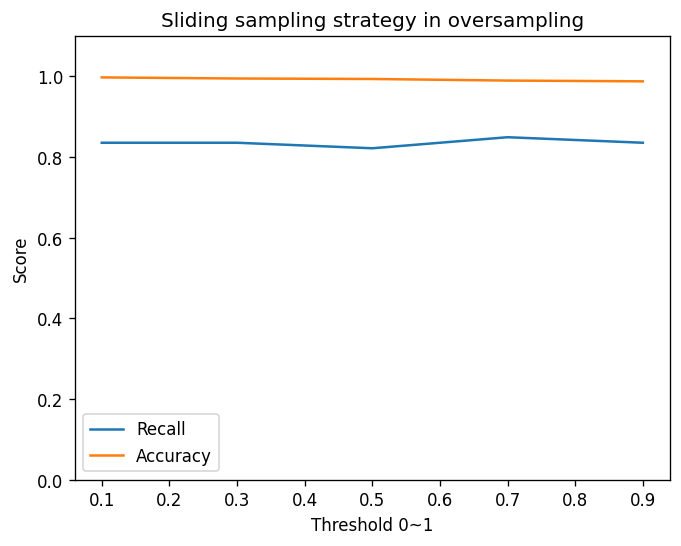

In [194]:
plt.plot(threshold, rec, label='Recall')
plt.plot(threshold, acc, label='Accuracy')
plt.ylim(0,1.1)
plt.title('Sliding sampling strategy in oversampling')
plt.xlabel('Threshold 0~1')
plt.ylabel('Score')
plt.legend()

## PART 4

In [198]:
# Train the classifier
Model_2_checkpoint = ModelCheckpoint('best_classifier.keras', monitor='val_loss', save_best_only=True, mode='min')
Model_2_history = Model_2.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_val, y_val),callbacks=[Model_2_checkpoint],verbose=2)
Model_2.load_weights('best_classifier.keras')

Epoch 1/10
3116/3116 - 7s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0029 - val_accuracy: 0.9995 - 7s/epoch - 2ms/step
Epoch 2/10
3116/3116 - 8s - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.0031 - val_accuracy: 0.9993 - 8s/epoch - 3ms/step
Epoch 3/10
3116/3116 - 7s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0027 - val_accuracy: 0.9995 - 7s/epoch - 2ms/step
Epoch 4/10
3116/3116 - 9s - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0030 - val_accuracy: 0.9995 - 9s/epoch - 3ms/step
Epoch 5/10
3116/3116 - 6s - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0030 - val_accuracy: 0.9995 - 6s/epoch - 2ms/step
Epoch 6/10
3116/3116 - 8s - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0035 - val_accuracy: 0.9994 - 8s/epoch - 3ms/step
Epoch 7/10
3116/3116 - 6s - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0045 - val_accuracy: 0.9990 - 6s/epoch - 2ms/step
Epoch 8/10
3116/3116 - 8s - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0037 - val_accuracy: 0.9995 - 8s/epoch - 3ms/step
Epoch 9/

In [201]:
# Evlation
y_prob = Model_2.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)

print(f' Accuracy = {accuracy_score(y_test, y_pred)}')
print(f' Recall = {recall_score(y_test, y_pred)} ')
print(f' Precision = {precision_score(y_test, y_pred)}')
print(f' F1-Score = {f1_score(y_test, y_pred)} ')

1336/1336 [==============================] - 2s 2ms/step
 Accuracy = 0.9994148214034924
 Recall = 0.7671232876712328 
 Precision = 0.875
 F1-Score = 0.8175182481751825 


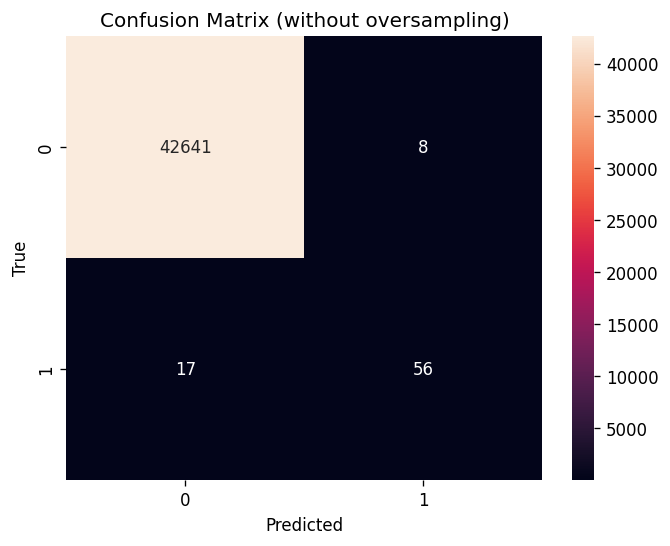

In [202]:
# Plot confusion matrix

sb.heatmap(confusion_matrix(y_test, y_pred) , annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (without oversampling)')
plt.show()